# FMR standard problem
## Problem specification
We choose a cuboidal thin film permalloy sample measuring $120 \times 120 \times 10 \,\text{nm}^{3}$. The choice of a cuboid is important as it ensures that the finite difference method employed by OOMMF does not introduce errors due to irregular boundaries that cannot be discretized well. We choose the thin film geometry to be thin enough so that the variation of magnetization dynamics along the out-of-film direction can be neglected. Material parameters based on permalloy are:
exchange energy constant $A = 1.3 \times 10^{-11} \,\text{J/m}$,
magnetisation saturation $M_\text{s} = 8 \times 10^{5} \,\text{A/m}$,
Gilbert damping $\alpha = 0.008$.
An external magnetic bias field with magnitude $80 \,\text{kA/m}$ is applied along the direction $e = (1, 0.715, 0)$. We choose the external magnetic field direction slightly off the sample diagonal in order to break the system’s symmetry and thus avoid degenerate eigenmodes. First, we initialize the system with a uniform out-of-plane magnetization $m_{0} = (0, 0, 1)$. The system is allowed to relax for $5 \,\text{ns}$, which was found to be sufficient time to obtain a well-converged equilibrium magnetization configuration. We refer to this stage of simulation as the relaxation stage, and its final relaxed magnetization configuration is saved to serve as the initial configuration for the next dynamic stage. Because we want to use a well defined method that is supported by all simulation tools, we minimize the system’s energy by integrating the LLG equation with a large, quasistatic Gilbert damping $\alpha = 1$ for $5 \,\text{ns}$. In the next step (dynamic stage), a simulation is started using the equilibrium magnetisation configuration from the relaxation stage as the initial configuration. Now, the direction of an external magnetic field is altered to $e = (1, 0.7, 0)$. This simulation stage runs for $T = 20 \,\text{ns}$ while the (average and spatially resolved) magnetization $M(t)$ is recorded every $\Delta t = 5 \,\text{ps}$. The Gilbert damping in this dynamic simulation stage is $\alpha = 0.008$.
Details of this standard problem specification can be found in Ref. 1.

In [15]:
import numpy as np
import fidimag
%load_ext autoreload
%autoreload 2

Lx = Ly = 120 # nm
Lz = 10 # nm
dx = dy = dz = 5 # nm
nx = int(Lx/dx)
ny = int(Ly/dy)
nz = int(Lz/dz)


A = 1.3e-11 # J/m
Ms = 8e5 # A/m
alpha = 0.008
B_mag = 80e3 # A / m
B_axis = np.array([1.0, 0.715, 0.0])
B = B_mag * B_axis / np.linalg.norm(B_axis)
m_init = np.array([0, 0, 1])
t_init = 5e-9


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We create and relax the system.

In [17]:
mesh = fidimag.common.CuboidMesh(nx=nx, ny=ny, nz=nz,
                                 dx=dx, dy=dy, dz=dz,
                                 unit_length=1e-9)

sim = fidimag.micro.Sim(mesh, name='relax')
sim.driver.alpha = 1.0
sim.set_Ms(Ms)
sim.set_m(m_init)
sim.add(fidimag.micro.UniformExchange(A))
sim.add(fidimag.micro.Demag())
sim.add(fidimag.micro.Zeeman(B))
sim.relax(stopping_dmdt=0.1)
np.save('m_relax.npy', sim.spin)



#1    t=1e-11    dt=1e-11 max_dmdt=1.53e+03
#2    t=2e-11    dt=1e-11 max_dmdt=3.18e+03
#3    t=3e-11    dt=1e-11 max_dmdt=3.75e+03
#4    t=4e-11    dt=1e-11 max_dmdt=3.12e+03
#5    t=5e-11    dt=1e-11 max_dmdt=2.78e+03
#6    t=6e-11    dt=1e-11 max_dmdt=2.08e+03
#7    t=7e-11    dt=1e-11 max_dmdt=1.52e+03
#8    t=8e-11    dt=1e-11 max_dmdt=1.42e+03
#9    t=9e-11    dt=1e-11 max_dmdt=1.48e+03
#10   t=1e-10    dt=1e-11 max_dmdt=1.51e+03
#11   t=1.1e-10  dt=1e-11 max_dmdt=1.5e+03
#12   t=1.2e-10  dt=1e-11 max_dmdt=1.42e+03
#13   t=1.3e-10  dt=1e-11 max_dmdt=1.38e+03
#14   t=1.4e-10  dt=1e-11 max_dmdt=1.4e+03
#15   t=1.5e-10  dt=1e-11 max_dmdt=1.32e+03
#16   t=1.6e-10  dt=1e-11 max_dmdt=1.24e+03
#17   t=1.7e-10  dt=1e-11 max_dmdt=1.27e+03
#18   t=1.8e-10  dt=1e-11 max_dmdt=1.32e+03
#19   t=1.9e-10  dt=1e-11 max_dmdt=1.36e+03
#20   t=2e-10    dt=1e-11 max_dmdt=1.39e+03
#21   t=2.1e-10  dt=1e-11 max_dmdt=1.39e+03
#22   t=2.2e-10  dt=1e-11 max_dmdt=1.32e+03
#23   t=2.3e-10  dt=1e-11 max_dmdt

We can now plot the $z$ slice of magnetisation.

In [59]:
import matplotlib.pyplot as plt

def plot_field(sim, comp='x'):

    if comp == 'x':
        cmpi = 0
    elif comp == 'y':
        cmpi = 1
    elif comp == 'z':
        cmpi = 2
    else:
        raise ValueError("Component must be one of 'x', 'y', or 'z'")

    data = sim.spin.copy()
    data.shape = (-1, 3)
    m = data[:,cmpi]
    nx = sim.mesh.nx
    ny = sim.mesh.ny
    nz = sim.mesh.nz
    m.shape = (nz, ny, nx)
    m2 = m[0,:,:]
    fig = plt.figure()
    # norm=color.Normalize(-1,1)
    im = plt.imshow(m2, aspect=1, cmap='viridis',
               origin='lower', interpolation='none')
    plt.autoscale(False)
    plt.colorbar(im)
    plt.xticks([])
    plt.yticks([])

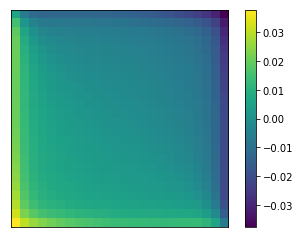

In [60]:
plot_field(sim, 'z')

# Dynamic stage

In the dynamic stage, we change the field, 'shocking' the system, and allow the system to evolve in time. This can be thought about in the same way as plucking a guitar string and exciting different modes of the string.

In [23]:
# Change the external field
B_axis = np.array([1.0, 0.7, 0.0])
B = B_mag * B_axis / np.linalg.norm(B_axis)
sim.get_interaction('Zeeman').update_field(B)
sim.driver.alpha = alpha
sim.driver.reset_integrator()

ts = np.linspace(0, 20e-9, 4000)

for t in ts:
    print(t)
    sim.driver.run_until(t)
    sim.save_m()
    sim.save_vtk()

0.0
5.00125031258e-12
1.00025006252e-11
1.50037509377e-11
2.00050012503e-11
2.50062515629e-11
3.00075018755e-11
3.5008752188e-11
4.00100025006e-11
4.50112528132e-11
5.00125031258e-11
5.50137534384e-11
6.00150037509e-11
6.50162540635e-11
7.00175043761e-11
7.50187546887e-11
8.00200050013e-11
8.50212553138e-11
9.00225056264e-11
9.5023755939e-11
1.00025006252e-10
1.05026256564e-10
1.10027506877e-10
1.15028757189e-10
1.20030007502e-10
1.25031257814e-10
1.30032508127e-10
1.3503375844e-10
1.40035008752e-10
1.45036259065e-10
1.50037509377e-10
1.5503875969e-10
1.60040010003e-10
1.65041260315e-10
1.70042510628e-10
1.7504376094e-10
1.80045011253e-10
1.85046261565e-10
1.90047511878e-10
1.95048762191e-10
2.00050012503e-10
2.05051262816e-10
2.10052513128e-10
2.15053763441e-10
2.20055013753e-10
2.25056264066e-10
2.30057514379e-10
2.35058764691e-10
2.40060015004e-10
2.45061265316e-10
2.50062515629e-10
2.55063765941e-10
2.60065016254e-10
2.65066266567e-10
2.70067516879e-10
2.75068767192e-10
2.800700175

2.29557389347e-09
2.30057514379e-09
2.3055763941e-09
2.31057764441e-09
2.31557889472e-09
2.32058014504e-09
2.32558139535e-09
2.33058264566e-09
2.33558389597e-09
2.34058514629e-09
2.3455863966e-09
2.35058764691e-09
2.35558889722e-09
2.36059014754e-09
2.36559139785e-09
2.37059264816e-09
2.37559389847e-09
2.38059514879e-09
2.3855963991e-09
2.39059764941e-09
2.39559889972e-09
2.40060015004e-09
2.40560140035e-09
2.41060265066e-09
2.41560390098e-09
2.42060515129e-09
2.4256064016e-09
2.43060765191e-09
2.43560890223e-09
2.44061015254e-09
2.44561140285e-09
2.45061265316e-09
2.45561390348e-09
2.46061515379e-09
2.4656164041e-09
2.47061765441e-09
2.47561890473e-09
2.48062015504e-09
2.48562140535e-09
2.49062265566e-09
2.49562390598e-09
2.50062515629e-09
2.5056264066e-09
2.51062765691e-09
2.51562890723e-09
2.52063015754e-09
2.52563140785e-09
2.53063265816e-09
2.53563390848e-09
2.54063515879e-09
2.5456364091e-09
2.55063765941e-09
2.55563890973e-09
2.56064016004e-09
2.56564141035e-09
2.57064266067e-09

4.59614903726e-09
4.60115028757e-09
4.60615153788e-09
4.6111527882e-09
4.61615403851e-09
4.62115528882e-09
4.62615653913e-09
4.63115778945e-09
4.63615903976e-09
4.64116029007e-09
4.64616154039e-09
4.6511627907e-09
4.65616404101e-09
4.66116529132e-09
4.66616654164e-09
4.67116779195e-09
4.67616904226e-09
4.68117029257e-09
4.68617154289e-09
4.6911727932e-09
4.69617404351e-09
4.70117529382e-09
4.70617654414e-09
4.71117779445e-09
4.71617904476e-09
4.72118029507e-09
4.72618154539e-09
4.7311827957e-09
4.73618404601e-09
4.74118529632e-09
4.74618654664e-09
4.75118779695e-09
4.75618904726e-09
4.76119029757e-09
4.76619154789e-09
4.7711927982e-09
4.77619404851e-09
4.78119529882e-09
4.78619654914e-09
4.79119779945e-09
4.79619904976e-09
4.80120030008e-09
4.80620155039e-09
4.8112028007e-09
4.81620405101e-09
4.82120530133e-09
4.82620655164e-09
4.83120780195e-09
4.83620905226e-09
4.84121030258e-09
4.84621155289e-09
4.8512128032e-09
4.85621405351e-09
4.86121530383e-09
4.86621655414e-09
4.87121780445e-09

6.89172293073e-09
6.89672418105e-09
6.90172543136e-09
6.90672668167e-09
6.91172793198e-09
6.9167291823e-09
6.92173043261e-09
6.92673168292e-09
6.93173293323e-09
6.93673418355e-09
6.94173543386e-09
6.94673668417e-09
6.95173793448e-09
6.9567391848e-09
6.96174043511e-09
6.96674168542e-09
6.97174293573e-09
6.97674418605e-09
6.98174543636e-09
6.98674668667e-09
6.99174793698e-09
6.9967491873e-09
7.00175043761e-09
7.00675168792e-09
7.01175293823e-09
7.01675418855e-09
7.02175543886e-09
7.02675668917e-09
7.03175793948e-09
7.0367591898e-09
7.04176044011e-09
7.04676169042e-09
7.05176294074e-09
7.05676419105e-09
7.06176544136e-09
7.06676669167e-09
7.07176794199e-09
7.0767691923e-09
7.08177044261e-09
7.08677169292e-09
7.09177294324e-09
7.09677419355e-09
7.10177544386e-09
7.10677669417e-09
7.11177794449e-09
7.1167791948e-09
7.12178044511e-09
7.12678169542e-09
7.13178294574e-09
7.13678419605e-09
7.14178544636e-09
7.14678669667e-09
7.15178794699e-09
7.1567891973e-09
7.16179044761e-09
7.16679169792e-09

9.18729682421e-09
9.19229807452e-09
9.19729932483e-09
9.20230057514e-09
9.20730182546e-09
9.21230307577e-09
9.21730432608e-09
9.22230557639e-09
9.22730682671e-09
9.23230807702e-09
9.23730932733e-09
9.24231057764e-09
9.24731182796e-09
9.25231307827e-09
9.25731432858e-09
9.26231557889e-09
9.26731682921e-09
9.27231807952e-09
9.27731932983e-09
9.28232058015e-09
9.28732183046e-09
9.29232308077e-09
9.29732433108e-09
9.3023255814e-09
9.30732683171e-09
9.31232808202e-09
9.31732933233e-09
9.32233058265e-09
9.32733183296e-09
9.33233308327e-09
9.33733433358e-09
9.3423355839e-09
9.34733683421e-09
9.35233808452e-09
9.35733933483e-09
9.36234058515e-09
9.36734183546e-09
9.37234308577e-09
9.37734433608e-09
9.3823455864e-09
9.38734683671e-09
9.39234808702e-09
9.39734933733e-09
9.40235058765e-09
9.40735183796e-09
9.41235308827e-09
9.41735433858e-09
9.4223555889e-09
9.42735683921e-09
9.43235808952e-09
9.43735933983e-09
9.44236059015e-09
9.44736184046e-09
9.45236309077e-09
9.45736434109e-09
9.4623655914e-

1.14778694674e-08
1.14828707177e-08
1.1487871968e-08
1.14928732183e-08
1.14978744686e-08
1.15028757189e-08
1.15078769692e-08
1.15128782196e-08
1.15178794699e-08
1.15228807202e-08
1.15278819705e-08
1.15328832208e-08
1.15378844711e-08
1.15428857214e-08
1.15478869717e-08
1.15528882221e-08
1.15578894724e-08
1.15628907227e-08
1.1567891973e-08
1.15728932233e-08
1.15778944736e-08
1.15828957239e-08
1.15878969742e-08
1.15928982246e-08
1.15978994749e-08
1.16029007252e-08
1.16079019755e-08
1.16129032258e-08
1.16179044761e-08
1.16229057264e-08
1.16279069767e-08
1.16329082271e-08
1.16379094774e-08
1.16429107277e-08
1.1647911978e-08
1.16529132283e-08
1.16579144786e-08
1.16629157289e-08
1.16679169792e-08
1.16729182296e-08
1.16779194799e-08
1.16829207302e-08
1.16879219805e-08
1.16929232308e-08
1.16979244811e-08
1.17029257314e-08
1.17079269817e-08
1.17129282321e-08
1.17179294824e-08
1.17229307327e-08
1.1727931983e-08
1.17329332333e-08
1.17379344836e-08
1.17429357339e-08
1.17479369842e-08
1.17529382346e

1.37734433608e-08
1.37784446112e-08
1.37834458615e-08
1.37884471118e-08
1.37934483621e-08
1.37984496124e-08
1.38034508627e-08
1.3808452113e-08
1.38134533633e-08
1.38184546137e-08
1.3823455864e-08
1.38284571143e-08
1.38334583646e-08
1.38384596149e-08
1.38434608652e-08
1.38484621155e-08
1.38534633658e-08
1.38584646162e-08
1.38634658665e-08
1.38684671168e-08
1.38734683671e-08
1.38784696174e-08
1.38834708677e-08
1.3888472118e-08
1.38934733683e-08
1.38984746187e-08
1.3903475869e-08
1.39084771193e-08
1.39134783696e-08
1.39184796199e-08
1.39234808702e-08
1.39284821205e-08
1.39334833708e-08
1.39384846212e-08
1.39434858715e-08
1.39484871218e-08
1.39534883721e-08
1.39584896224e-08
1.39634908727e-08
1.3968492123e-08
1.39734933733e-08
1.39784946237e-08
1.3983495874e-08
1.39884971243e-08
1.39934983746e-08
1.39984996249e-08
1.40035008752e-08
1.40085021255e-08
1.40135033758e-08
1.40185046262e-08
1.40235058765e-08
1.40285071268e-08
1.40335083771e-08
1.40385096274e-08
1.40435108777e-08
1.4048512128e-08

1.6064016004e-08
1.60690172543e-08
1.60740185046e-08
1.60790197549e-08
1.60840210053e-08
1.60890222556e-08
1.60940235059e-08
1.60990247562e-08
1.61040260065e-08
1.61090272568e-08
1.61140285071e-08
1.61190297574e-08
1.61240310078e-08
1.61290322581e-08
1.61340335084e-08
1.61390347587e-08
1.6144036009e-08
1.61490372593e-08
1.61540385096e-08
1.61590397599e-08
1.61640410103e-08
1.61690422606e-08
1.61740435109e-08
1.61790447612e-08
1.61840460115e-08
1.61890472618e-08
1.61940485121e-08
1.61990497624e-08
1.62040510128e-08
1.62090522631e-08
1.62140535134e-08
1.62190547637e-08
1.6224056014e-08
1.62290572643e-08
1.62340585146e-08
1.62390597649e-08
1.62440610153e-08
1.62490622656e-08
1.62540635159e-08
1.62590647662e-08
1.62640660165e-08
1.62690672668e-08
1.62740685171e-08
1.62790697674e-08
1.62840710178e-08
1.62890722681e-08
1.62940735184e-08
1.62990747687e-08
1.6304076019e-08
1.63090772693e-08
1.63140785196e-08
1.63190797699e-08
1.63240810203e-08
1.63290822706e-08
1.63340835209e-08
1.63390847712e

1.83595898975e-08
1.83645911478e-08
1.83695923981e-08
1.83745936484e-08
1.83795948987e-08
1.8384596149e-08
1.83895973993e-08
1.83945986497e-08
1.83995999e-08
1.84046011503e-08
1.84096024006e-08
1.84146036509e-08
1.84196049012e-08
1.84246061515e-08
1.84296074019e-08
1.84346086522e-08
1.84396099025e-08
1.84446111528e-08
1.84496124031e-08
1.84546136534e-08
1.84596149037e-08
1.8464616154e-08
1.84696174044e-08
1.84746186547e-08
1.8479619905e-08
1.84846211553e-08
1.84896224056e-08
1.84946236559e-08
1.84996249062e-08
1.85046261565e-08
1.85096274069e-08
1.85146286572e-08
1.85196299075e-08
1.85246311578e-08
1.85296324081e-08
1.85346336584e-08
1.85396349087e-08
1.8544636159e-08
1.85496374094e-08
1.85546386597e-08
1.855963991e-08
1.85646411603e-08
1.85696424106e-08
1.85746436609e-08
1.85796449112e-08
1.85846461615e-08
1.85896474119e-08
1.85946486622e-08
1.85996499125e-08
1.86046511628e-08
1.86096524131e-08
1.86146536634e-08
1.86196549137e-08
1.8624656164e-08
1.86296574144e-08
1.86346586647e-08
1.

# Postprocessing

We read in the data files and compute the spatially averaged power spectral density, which shows the distribution of power in the excited modes.

In [121]:
m_0 = np.load('m_relax.npy')
mxs = []
mys = []
mzs = []
for i in range(4000):
    m = np.load('relax_npys/m_{}.npy'.format(i)) - m_0
    mxs.append(np.mean(m[0::3]))
    mys.append(np.mean(m[1::3]))
    mzs.append(np.mean(m[2::3]))

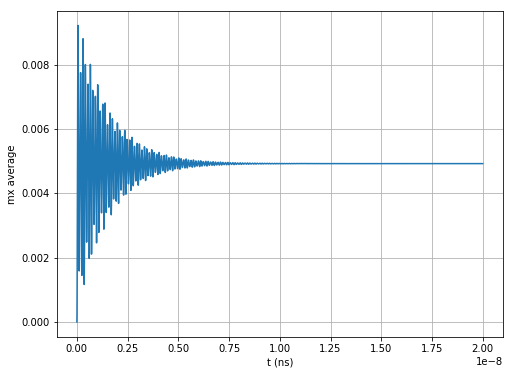

In [122]:
plt.figure(figsize=(8, 6))
plt.plot(ts, mxs)
plt.xlabel('t (ns)')
plt.ylabel('mx average')
plt.grid()

(0, 50)

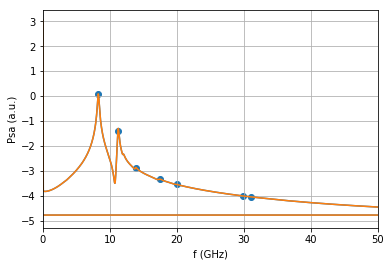

In [141]:
import scipy.fftpack
psd = np.log10(np.abs(scipy.fftpack.fft(mxs))**2 + \
               np.abs(scipy.fftpack.fft(mys))**2 + \
               np.abs(scipy.fftpack.fft(mzs))**2)
f_axis = scipy.fftpack.fftfreq(4000, d=20e-9/4000)

plt.plot(f_axis/1e9, psd)
plt.xlim([0, 40])
plt.grid()
plt.xlabel('f (GHz)')
plt.ylabel('Psa (a.u.)')

peakind = signal.find_peaks_cwt(psd, np.arange(1,50, 0.1))
plt.plot(f_axis/1e9, psd)
plt.scatter(f_axis[peakind]/1e9, psd[peakind])
plt.xlim([0, 50])